In [12]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_train.shape

(60000, 785)

In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)
df_test.shape

(10000, 785)

In [4]:
28 * 28

784

In [11]:
df_train.iloc[0,1:].values.reshape(28, 28).shape

(28, 28)

In [30]:
X_train = df_train.iloc[:,1:].values
X_train.shape

(60000, 784)

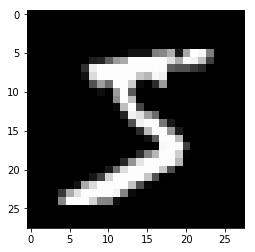

In [17]:
plt.imshow(X_train[0].reshape((28, 28)), cmap = "gray")

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   503214.,
          469607.,   518723.,   611860.,  4118027.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

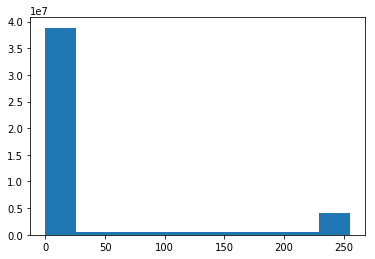

In [18]:
plt.hist(X_train.flatten())

In [19]:
pd.Series(X_train.flatten()).describe()

count    4.704000e+07
mean     3.331842e+01
std      7.856749e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
dtype: float64

In [32]:
import numpy as np

In [34]:
np.sum(X_train==0)/np.product(X_train.shape)

0.8087977040816327

In [79]:
# Min Max scaling
X_train = df_train.iloc[:,1:].values/255
y_train = df_train.iloc[:, 0].values
X_test = df_test.iloc[:,1:].values/255
y_test = df_test.iloc[:, 0].values

In [36]:
np.sum(X_train==0)/np.product(X_train.shape)

0.8087977040816327

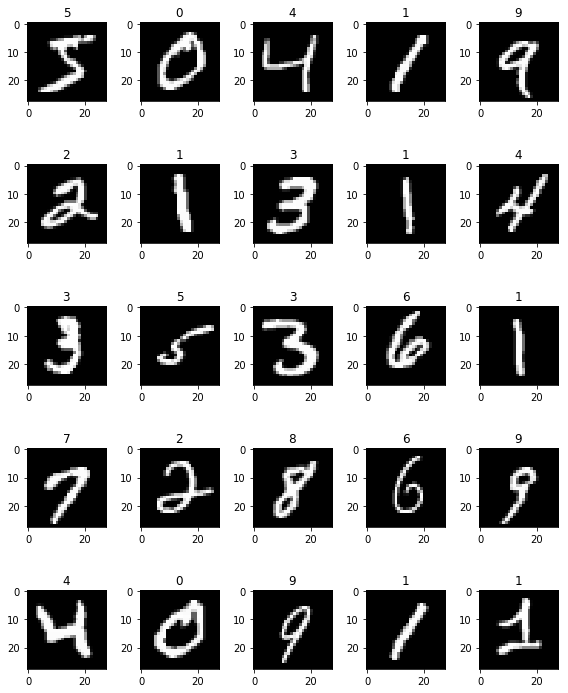

In [26]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

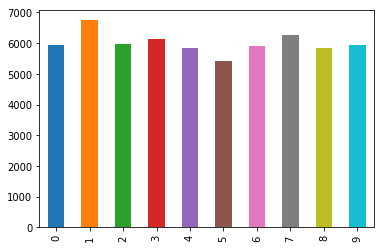

In [29]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [38]:
from sklearn import linear_model

In [40]:
%%time
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.9083 iterations: 16
CPU times: user 9.87 s, sys: 143 ms, total: 10 s
Wall time: 3.43 s


In [75]:
y_test_pred = est.predict(X_test)
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
summary["mismatch"] = summary.actual != summary.prediction
summary[summary.mismatch].head(10)

,actual,prediction,mismatch
8,5,6,True
33,4,6,True
63,3,2,True
66,6,7,True
77,2,7,True
92,9,4,True
111,7,1,True
124,7,4,True
149,2,9,True
151,9,2,True


In [59]:
import seaborn as sns

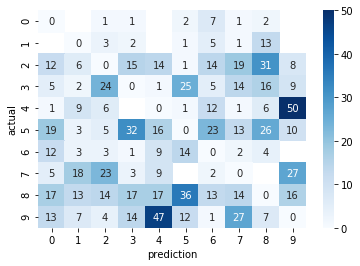

In [63]:
sns.heatmap(summary.pivot_table("mismatch", "actual", "prediction", 
                        aggfunc="sum"), cmap = "Blues", annot = True)

In [68]:
summary.head()

,actual,prediction,mismatch
0,7,7,False
1,2,2,False
2,1,1,False
3,0,0,False
4,4,4,False


In [71]:
mismatch

array([False, False, False, ..., False,  True, False])

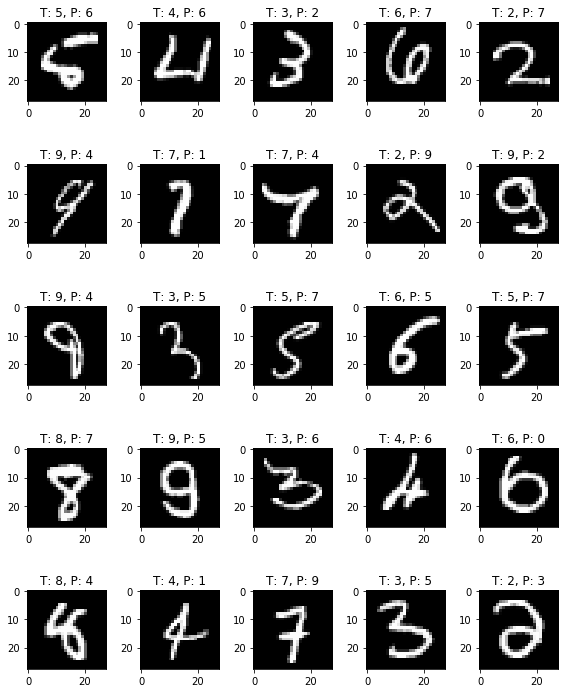

In [80]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
#mismatch = summary[summary.mismatch].index
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[summary.mismatch][i].reshape((28, 28)), cmap = "gray")
    title = "T: %d, P: %d" % (y_test[summary.mismatch][i]
                        , y_test_pred[summary.mismatch][i])
    ax.set_title(title)
    
plt.tight_layout()

In [92]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [81]:
import keras

Using TensorFlow backend.


In [96]:
model = keras.Sequential()

model.add(keras.layers.InputLayer((784,))) # Input layer
model.add(keras.layers.Dense(400, activation="relu")) # hidden layer
model.add(keras.layers.Dense(200, activation="relu")) # hidden layer
model.add(keras.layers.Dense(10, activation="softmax")) # Output later

model.compile(optimizer="adam"
              , loss = keras.losses.categorical_crossentropy
              , metrics=["accuracy"])

model.summary()

model.fit(X_train, Y_train
          , validation_data=(X_test, Y_test)
          , batch_size=128
          , epochs=10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2401 - acc: 0.9288 - val_loss: 0.1048 - val_acc: 0.9674
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0890 - acc: 0.9736 - val_loss: 0.0789 - val_acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - los